# All Metrics Analysis

### Import Packages

In [1]:
import nltk
import pandas as pd
import numpy as np

import os
from os.path import expanduser
import glob

from scipy import stats
from scipy.stats import pearsonr

import shared_functions as sf
from shared_functions import *

import originality_methods as om
from originality_methods import  *

import flexibility_methods as fm
from flexibility_methods import *

import seaborn as sns
import matplotlib.pyplot as plt
from heatmap import heatmap, corrplot

## Read in Data to Analyze

In [2]:
cwd = os.getcwd()

In [3]:
# read in the official novelty results
novelty_dict = {}
for filename in glob.glob(cwd + '/..//results/results_methods/novelty_results/novelty_071921/*.csv'):
    novelty_dict[filename[122:-4]] = pd.read_csv(filename)

In [4]:
# read in the official flexibility results
flexibility_dict = {}
for filename in glob.glob(cwd + '/..//results/results_methods/flexibility_results/flexibility_071921/*.csv'):
    flexibility_dict[filename[157:-4]] = pd.read_csv(filename)

In [5]:
# read in the official originality results
originality_dict = {}
for filename in glob.glob(cwd + '/..//results/results_methods/originality_results/originality_071921/freqs/*.csv'):
    originality_dict[filename[169:-4]] = pd.read_csv(filename)

In [6]:
# read in the official fluency results
fluency_dict = {}
for filename in glob.glob(cwd + '/..//results/results_methods/fluency_results/fluency_071521/*.csv'):
    fluency_dict[filename[145:-4]] = pd.read_csv(filename)

## Comparing Flexibility Results with Human Ratings

In [7]:
# create pvalues matrix
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

### Correlations for Each Prompt
#### Between Human Rater and Method

In [8]:
# calculate corrrelation once
def flexibility_corr(flexibility_dict):
    # list to store list of tuples, later turn into df
    corrs_tuple_list = []
    # get list of keys to iterate through
    flexibility_keys = list(flexibility_dict.keys())
    # calculate the corr coefficient and pval
    for data in flexibility_keys:
        corrs_tuple_list.append(stats.pearsonr(flexibility_dict[data]['flex_m'], flexibility_dict[data]['flex_method']))
        
    # turn list of tuples into df
    result_df = pd.DataFrame(corrs_tuple_list, columns=['corrs', 'pval'])
    
    # rename index with corresponding prompt
    result_df.index = flexibility_keys
    
    # return df
    return result_df

In [9]:
flexibility_corr(flexibility_dict)

,corrs,pval
box,0.397504,0.000115
brick,0.277716,0.008414
chair,0.222167,0.035328
cup,0.168713,0.113996
key,0.421136,0.000036
pencil,0.281232,0.007250
rope,0.336711,0.001175
shoe,0.308043,0.003140


In [10]:
def get_novelty_avg_semdis(collapse_df):
    # get id list
    id_list = sf.get_id_list(collapse_df)
    participant_values = []
    
    for participant in id_list:
        values_list = []
        values_list.append(participant)
        temp_df = collapse_df.loc[collapse_df['id'] == participant]
        values_list.append(temp_df["ewm_vector_cosine_dis"].mean())
        values_list.append(temp_df["ewm_vector_cosine_dis_clus_avg"].mean())
        values_list.append(temp_df["minima_vector_cosine_dis"].mean())
        values_list.append(temp_df["minima_vector_cosine_dis_clus_avg"].mean())
#         values_list.append(temp_df["minima_vector_cosine_dis_clus_min"].mean())
        values_list.append(temp_df["SemDis_cbowukwacsubtitle_nf_m"].mean())
        values_list.append(temp_df["SemDis_cbowsubtitle_nf_m"].mean())
        values_list.append(temp_df["SemDis_cbowBNCwikiukwac_nf_m"].mean())
        values_list.append(temp_df["SemDis_TASA_nf_m"].mean())
        values_list.append(temp_df["SemDis_glove_nf_m"].mean())
        values_list.append(temp_df["SemDis_MEAN"].mean())
        values_list.append(temp_df["novelty_1"].mean())
        values_list.append(temp_df["novelty_2"].mean())
        values_list.append(temp_df["novelty_m"].mean())

        values_tuple = tuple(values_list)
        participant_values.append(values_tuple)
        
    participant_avg_novelty_df = pd.DataFrame(participant_values, columns=['id', 'ewm', 'ewm_clust', 'minvec', 'minvec_clust', 
#                                                                            "minvec_min",
                                                                          'cbowukwacsubtitle', 'cbowsubtitle', 'cbowBNCwikiukwac', 'TASA', 'glove'
                                                                           , "SemDis_MEAN", 'novelty_1', 'novelty_2', 'novelty_m'])
    return participant_avg_novelty_df

In [11]:
def get_novelty_avg(collapse_df):
    # get id list
    id_list = sf.get_id_list(collapse_df)
    participant_values = []
    
    for participant in id_list:
        values_list = []
        values_list.append(participant)
        temp_df = collapse_df.loc[collapse_df['id'] == participant]
        values_list.append(temp_df["ewm_vector_cosine_dis"].mean())
        values_list.append(temp_df["ewm_vector_cosine_dis_clus_avg"].mean())
        values_list.append(temp_df["minima_vector_cosine_dis"].mean())
        values_list.append(temp_df["minima_vector_cosine_dis_clus_avg"].mean())
#         values_list.append(temp_df["minima_vector_cosine_dis_clus_min"].mean())
        values_list.append(temp_df["novelty_1"].mean())
        values_list.append(temp_df["novelty_2"].mean())
        values_list.append(temp_df["novelty_m"].mean())
        values_tuple = tuple(values_list)
        participant_values.append(values_tuple)
        
    participant_avg_novelty_df = pd.DataFrame(participant_values, columns=['id', 'ewm', 'ewm_clust', 'minvec'
                                                                           , 'minvec_clust'
#                                                                            , "minvec_min"
                                                                           ,"novelty_1", 'novelty_2', 'novelty_m'])
    
    return participant_avg_novelty_df

In [12]:
def get_flexibility_avg(collapse_df):
    # get id list
    id_list = sf.get_id_list(collapse_df)
    participant_values = []
    
    for participant in id_list:
        values_list = []
        values_list.append(participant)
        temp_df = collapse_df.loc[collapse_df['id'] == participant]
        values_list.append(temp_df["flex_1"].mean())
        values_list.append(temp_df["flex_2"].mean())
        values_list.append(temp_df["flex_m"].mean())
        values_list.append(temp_df["flex_method"].mean())
        values_tuple = tuple(values_list)
        participant_values.append(values_tuple)
        
    participant_avg_flexibility_df = pd.DataFrame(participant_values, columns=['id', 'flex_1', 'flex_2', "flex_m", 'flex_method'])
    
    return participant_avg_flexibility_df

In [13]:
def get_originality_avg(collapse_df):
    # get id list
    id_list = sf.get_id_list(collapse_df)
    participant_values = []
    
    for participant in id_list:
        values_list = []
        values_list.append(participant)
        temp_df = collapse_df.loc[collapse_df['id'] == participant]
        values_list.append(temp_df["t_freq"].mean())
        values_tuple = tuple(values_list)
        participant_values.append(values_tuple)
        
    participant_avg_originality_df = pd.DataFrame(participant_values, columns=['id', 'originality'])
    
    return participant_avg_originality_df

In [14]:
def get_fluency_avg(collapse_df):
    # get id list
    id_list = sf.get_id_list(collapse_df)
    participant_values = []
    
    for participant in id_list:
        values_list = []
        values_list.append(participant)
        temp_df = collapse_df.loc[collapse_df['id'] == participant]
        values_list.append(temp_df["fluency"].mean())
        values_tuple = tuple(values_list)
        participant_values.append(values_tuple)
        
    participant_avg_fluency_df = pd.DataFrame(participant_values, columns=['id', 'fluency'])
    
    return participant_avg_fluency_df

## Big Correlation Matrix

In [15]:
def calculate_mega_matrix(novelty_dict_values, flexibility_dict_values, originality_dict_value, fluency_dict_value):
    collapse_novelty_df = pd.concat(novelty_dict_values)
    collapse_flexibility_df = pd.concat(flexibility_dict_values)
    collapse_originality_df = pd.concat(originality_dict_value)
    collapse_fluency_df = pd.concat(fluency_dict_value)
    participant_avg_novelty_df = get_novelty_avg_semdis(collapse_novelty_df)
    participant_avg_flexibility_df = get_flexibility_avg(collapse_flexibility_df)
    participant_avg_originality_df = get_originality_avg(collapse_originality_df)
    participant_avg_fluency_df = get_fluency_avg(collapse_fluency_df)
    combined_df = pd.merge(participant_avg_novelty_df, participant_avg_flexibility_df, how='inner', on = 'id')
    combined_df = pd.merge(combined_df, participant_avg_originality_df, how='inner', on = 'id')
    combined_df = pd.merge(combined_df, participant_avg_fluency_df, how='inner', on = 'id')
    combined_df = combined_df.drop('id', axis=1)
    pval_df = calculate_pvalues(combined_df)
    corrs_df = combined_df.corr()
    return (corrs_df, pval_df)

In [16]:
mega_matrix = calculate_mega_matrix(novelty_dict.values(), flexibility_dict.values(), originality_dict.values(), fluency_dict.values())

In [17]:
# mega_matrix[0].to_csv("mega_matrix_corrs_071921.csv")

In [18]:
# mega_matrix[1].to_csv("mega_matrix_pvals_071921.csv")

## Big Heatmap

In [19]:
def get_collapsed_table(novelty_dict_values, flexibility_dict_values, originality_dict_value, fluency_dict_value):
    collapse_novelty_df = pd.concat(novelty_dict_values)
    collapse_flexibility_df = pd.concat(flexibility_dict_values)
    collapse_originality_df = pd.concat(originality_dict_value)
    collapse_fluency_df = pd.concat(fluency_dict_value)
    participant_avg_novelty_df = get_novelty_avg_semdis(collapse_novelty_df)
    participant_avg_flexibility_df = get_flexibility_avg(collapse_flexibility_df)
    participant_avg_originality_df = get_originality_avg(collapse_originality_df)
    participant_avg_fluency_df = get_fluency_avg(collapse_fluency_df)
    combined_df = pd.merge(participant_avg_novelty_df, participant_avg_flexibility_df, how='inner', on = 'id')
    combined_df = pd.merge(combined_df, participant_avg_originality_df, how='inner', on = 'id')
    combined_df = pd.merge(combined_df, participant_avg_fluency_df, how='inner', on = 'id')
    combined_df = combined_df.drop('id', axis=1)
    combined_df = combined_df.rename(columns={'cbowukwacsubtitle': 'SD:cbowukwacsubtitle', 'cbowsubtitle': 'SD:cbowsubtitle'
                                             , 'cbowBNCwikiukwac': 'SD:cbowBNCwikiukwac', 'TASA': 'SD:TASA'
                                             , 'glove': 'SD:glove', 'SemDis_MEAN': 'SD:mean'
                                             , 'novelty_1': 'Human:novelty_1', 'novelty_2': 'Human:novelty_2'
                                             , 'novelty_m': "Human:novelty_m", 'flex_1': 'Human:flexibility_1'
                                             , 'flex_2': 'Human:flexibility_2', 'flex_m': 'Human:flexibility_m'
                                             , 'flex_method': 'Algo:flexibility', 'originality': 'Algo:originality'
                                             , 'ewm': 'Algo:novelty_ewm', 'ewm_clust': 'Algo:novelty_ewm_clust'
                                             , 'minvec': 'Algo:novelty_minvec', 'minvec_clust': 'Algo:novelty_minvec_clust'})
    display(combined_df)
    return combined_df

In [20]:
collapsed_table = get_collapsed_table(novelty_dict.values(), flexibility_dict.values(), originality_dict.values(), fluency_dict.values())

,Algo:novelty_ewm,Algo:novelty_ewm_clust,Algo:novelty_minvec,Algo:novelty_minvec_clust,SD:cbowukwacsubtitle,SD:cbowsubtitle,SD:cbowBNCwikiukwac,SD:TASA,SD:glove,SD:mean,Human:novelty_1,Human:novelty_2,Human:novelty_m,Human:flexibility_1,Human:flexibility_2,Human:flexibility_m,Algo:flexibility,Algo:originality,fluency
0,0.916258,0.901647,0.868873,0.869091,0.950625,0.958228,0.950869,0.965343,1.004823,0.965978,2.627907,2.744186,2.686047,3.250000,3.250000,3.250000,3.125000,0.377740,5.375000
1,0.862551,0.914428,0.843163,0.873930,0.825773,0.868308,0.876216,0.919684,0.862047,0.870406,2.192308,2.480769,2.336538,2.250000,2.250000,2.250000,2.875000,0.420245,6.500000
2,0.905071,0.892143,0.870615,0.846195,0.906865,0.952628,0.948744,0.945728,0.985755,0.947944,2.303030,2.393939,2.348485,1.875000,1.875000,1.875000,2.875000,0.423395,4.125000
3,0.873790,0.902277,0.838416,0.863306,0.828138,0.884715,0.892016,0.926774,0.879658,0.882260,2.608696,2.565217,2.586957,2.500000,2.500000,2.500000,3.125000,0.404967,5.750000
4,0.909909,0.906082,0.851334,0.859603,0.904187,0.931952,0.917701,0.924515,0.945857,0.924842,2.551724,2.310345,2.431034,2.000000,2.000000,2.000000,2.500000,0.544885,3.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.817126,0.889750,0.798429,0.846484,0.758211,0.814478,0.853996,0.873162,0.827565,0.825482,2.058824,2.176471,2.117647,2.375000,2.375000,2.375000,2.500000,0.478145,4.250000
86,0.912743,0.893501,0.860549,0.845253,0.920046,0.972731,0.975829,0.962938,1.010314,0.968372,2.023810,2.142857,2.083333,1.875000,1.875000,1.875000,3.625000,0.484650,5.375000
87,0.897082,0.902278,0.841062,0.861676,0.896435,0.952157,0.939680,0.958445,0.997124,0.948768,2.321429,2.321429,2.321429,1.750000,1.750000,1.750000,2.875000,0.542983,3.500000
88,0.872219,0.890410,0.839820,0.841838,0.871796,0.923463,0.922524,0.936500,0.946687,0.920194,2.378378,2.270270,2.324324,1.625000,1.625000,1.625000,2.750000,0.381521,4.750000


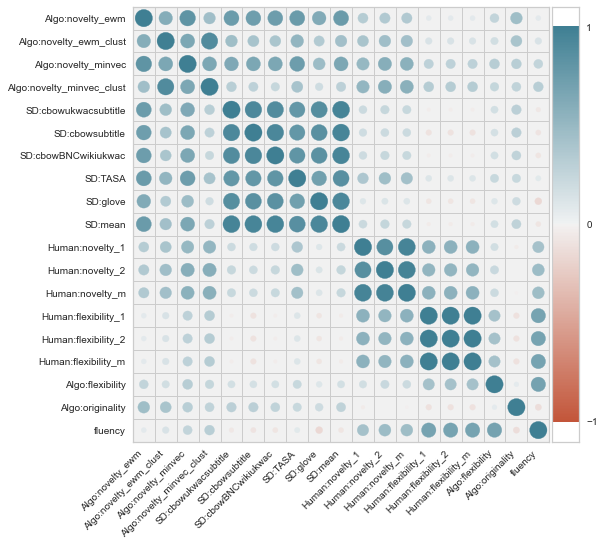

In [21]:
plt.figure(figsize=(8, 8))
corr_matrix = corrplot(collapsed_table.corr(), size_scale=300, marker='o')

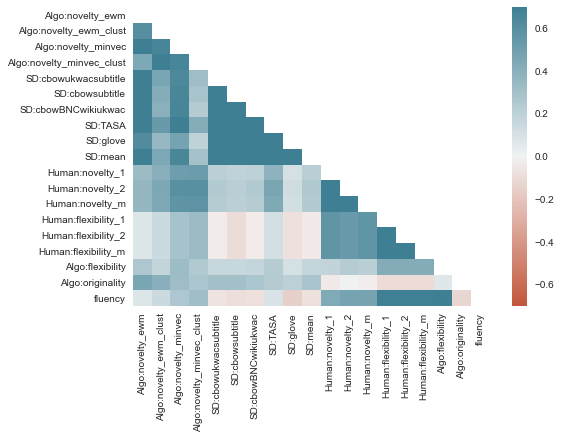

In [22]:
collapsed_table_matrix = np.triu(collapsed_table.corr())
collapsed_table_hm = sns.heatmap(collapsed_table.corr(), vmin=-0.7, vmax=0.7, center= 0, mask=collapsed_table_matrix
           , cmap = sns.diverging_palette(20, 220, as_cmap=True))

# collapsed_table_hm.set_xticklabels(collapsed_table_hm.get_xticklabels(), rotation=45)

## Novelty vs SemDis vs Human Ratings Heatmaps

In [23]:
def get_novelty_semdis_human_table(novelty_dict_values):
    collapse_novelty_df = pd.concat(novelty_dict_values)
    participant_avg_novelty_df = get_novelty_avg_semdis(collapse_novelty_df)
    participant_avg_novelty_df = participant_avg_novelty_df.drop('id', axis=1)
    participant_avg_novelty_df = participant_avg_novelty_df.rename(columns={'cbowukwacsubtitle': 'SD:cbowukwacsubtitle', 'cbowsubtitle': 'SD:cbowsubtitle'
                                             , 'cbowBNCwikiukwac': 'SD:cbowBNCwikiukwac', 'TASA': 'SD:TASA'
                                             , 'glove': 'SD:glove', 'SemDis_MEAN': 'SD:mean'
                                             , 'novelty_1': 'Human:novelty_1', 'novelty_2': 'Human:novelty_2'
                                             , 'novelty_m': "Human:novelty_m"
                                             , 'ewm': 'Algo:novelty_ewm', 'ewm_clust': 'Algo:novelty_ewm_clust'
                                             , 'minvec': 'Algo:novelty_minvec', 'minvec_clust': 'Algo:novelty_minvec_clust'})
    participant_avg_novelty_df = participant_avg_novelty_df[['Human:novelty_1',
                                                             'Human:novelty_2',
                                                             'Human:novelty_m',  
                                                             'Algo:novelty_ewm',
                                                             'Algo:novelty_ewm_clust',
                                                             'Algo:novelty_minvec',
                                                             'Algo:novelty_minvec_clust',
                                                             'SD:cbowukwacsubtitle',
                                                             'SD:cbowsubtitle',
                                                             'SD:cbowBNCwikiukwac',
                                                             'SD:TASA',
                                                             'SD:glove',
                                                             'SD:mean']]
    display(participant_avg_novelty_df)
    return participant_avg_novelty_df

In [24]:
novelty_semdis_human_table = get_novelty_semdis_human_table(novelty_dict.values())

,Human:novelty_1,Human:novelty_2,Human:novelty_m,Algo:novelty_ewm,Algo:novelty_ewm_clust,Algo:novelty_minvec,Algo:novelty_minvec_clust,SD:cbowukwacsubtitle,SD:cbowsubtitle,SD:cbowBNCwikiukwac,SD:TASA,SD:glove,SD:mean
0,2.627907,2.744186,2.686047,0.916258,0.901647,0.868873,0.869091,0.950625,0.958228,0.950869,0.965343,1.004823,0.965978
1,2.192308,2.480769,2.336538,0.862551,0.914428,0.843163,0.873930,0.825773,0.868308,0.876216,0.919684,0.862047,0.870406
2,2.303030,2.393939,2.348485,0.905071,0.892143,0.870615,0.846195,0.906865,0.952628,0.948744,0.945728,0.985755,0.947944
3,2.608696,2.565217,2.586957,0.873790,0.902277,0.838416,0.863306,0.828138,0.884715,0.892016,0.926774,0.879658,0.882260
4,2.551724,2.310345,2.431034,0.909909,0.906082,0.851334,0.859603,0.904187,0.931952,0.917701,0.924515,0.945857,0.924842
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2.058824,2.176471,2.117647,0.817126,0.889750,0.798429,0.846484,0.758211,0.814478,0.853996,0.873162,0.827565,0.825482
86,2.023810,2.142857,2.083333,0.912743,0.893501,0.860549,0.845253,0.920046,0.972731,0.975829,0.962938,1.010314,0.968372
87,2.321429,2.321429,2.321429,0.897082,0.902278,0.841062,0.861676,0.896435,0.952157,0.939680,0.958445,0.997124,0.948768
88,2.378378,2.270270,2.324324,0.872219,0.890410,0.839820,0.841838,0.871796,0.923463,0.922524,0.936500,0.946687,0.920194


In [25]:
list(novelty_semdis_human_table.columns.values)

['Human:novelty_1',
 'Human:novelty_2',
 'Human:novelty_m',
 'Algo:novelty_ewm',
 'Algo:novelty_ewm_clust',
 'Algo:novelty_minvec',
 'Algo:novelty_minvec_clust',
 'SD:cbowukwacsubtitle',
 'SD:cbowsubtitle',
 'SD:cbowBNCwikiukwac',
 'SD:TASA',
 'SD:glove',
 'SD:mean']

[Text(0.5, 0, 'Human:novelty_1'),
 Text(1.5, 0, 'Human:novelty_2'),
 Text(2.5, 0, 'Human:novelty_m'),
 Text(3.5, 0, 'Algo:novelty_ewm'),
 Text(4.5, 0, 'Algo:novelty_ewm_clust'),
 Text(5.5, 0, 'Algo:novelty_minvec'),
 Text(6.5, 0, 'Algo:novelty_minvec_clust'),
 Text(7.5, 0, 'SD:cbowukwacsubtitle'),
 Text(8.5, 0, 'SD:cbowsubtitle'),
 Text(9.5, 0, 'SD:cbowBNCwikiukwac'),
 Text(10.5, 0, 'SD:TASA'),
 Text(11.5, 0, 'SD:glove'),
 Text(12.5, 0, 'SD:mean')]

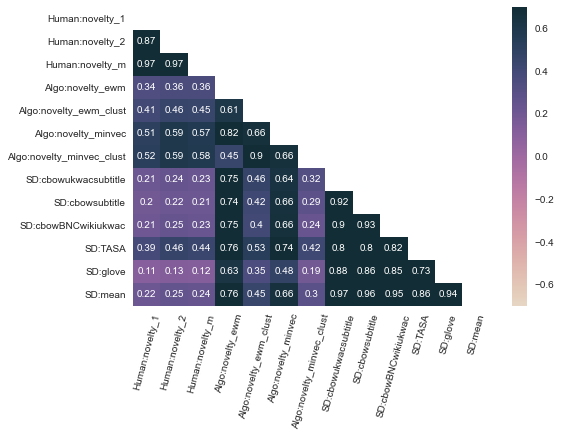

In [198]:
custom_palette = sns.light_palette("#4E2A84", reverse=True, as_cmap=True)
custom_palette = sns.color_palette("dark:purple", as_cmap=True)
custom_palette = sns.color_palette("ch:s=-.8,r=.8", as_cmap=True)
# custom_palette = sns.cubehelix_palette(as_cmap=True)

novelty_semdis_human_table_matrix = np.triu(novelty_semdis_human_table.corr())
novelty_semdis_human_table_hm = sns.heatmap(novelty_semdis_human_table.corr(), vmin=-0.7, vmax=0.7, center= 0, mask=novelty_semdis_human_table_matrix
            , annot = True, fmt='.2g', cmap = custom_palette
           , annot_kws={"fontsize":10})
# sns.diverging_palette(220, 280, s=80, l=55, n=9, as_cmap=True)
novelty_semdis_human_table_hm.set_xticklabels(novelty_semdis_human_table_hm.get_xticklabels(), rotation=75)


## Novelty vs Human Ratings

In [27]:
def get_novelty_human_table(novelty_dict_values):
    collapse_novelty_df = pd.concat(novelty_dict_values)
    participant_avg_novelty_df = get_novelty_avg(collapse_novelty_df)
    participant_avg_novelty_df = participant_avg_novelty_df.drop('id', axis=1)
    participant_avg_novelty_df = participant_avg_novelty_df.rename(columns={
                                              'novelty_1': 'Human:novelty_1', 'novelty_2': 'Human:novelty_2'
                                             , 'novelty_m': "Human:novelty_m"
                                             , 'ewm': 'Algo:novelty_ewm', 'ewm_clust': 'Algo:novelty_ewm_clust'
                                             , 'minvec': 'Algo:novelty_minvec', 'minvec_clust': 'Algo:novelty_minvec_clust'})
    display(participant_avg_novelty_df)
    return participant_avg_novelty_df

In [28]:
novelty_human_table = get_novelty_human_table(novelty_dict.values())

,Algo:novelty_ewm,Algo:novelty_ewm_clust,Algo:novelty_minvec,Algo:novelty_minvec_clust,Human:novelty_1,Human:novelty_2,Human:novelty_m
0,0.916258,0.901647,0.868873,0.869091,2.627907,2.744186,2.686047
1,0.862551,0.914428,0.843163,0.873930,2.192308,2.480769,2.336538
2,0.905071,0.892143,0.870615,0.846195,2.303030,2.393939,2.348485
3,0.873790,0.902277,0.838416,0.863306,2.608696,2.565217,2.586957
4,0.909909,0.906082,0.851334,0.859603,2.551724,2.310345,2.431034
...,...,...,...,...,...,...,...
85,0.817126,0.889750,0.798429,0.846484,2.058824,2.176471,2.117647
86,0.912743,0.893501,0.860549,0.845253,2.023810,2.142857,2.083333
87,0.897082,0.902278,0.841062,0.861676,2.321429,2.321429,2.321429
88,0.872219,0.890410,0.839820,0.841838,2.378378,2.270270,2.324324


<AxesSubplot:>

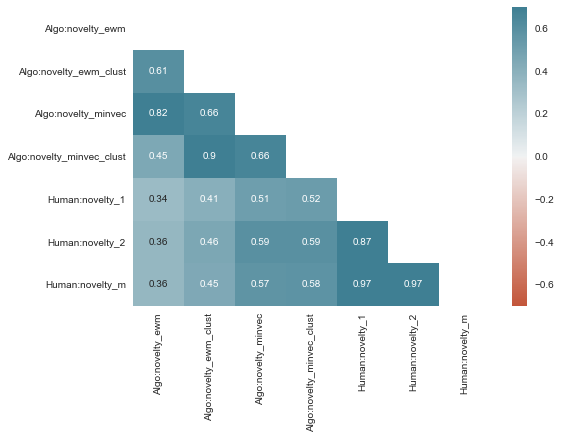

In [29]:
novelty_human_table_matrix = np.triu(novelty_human_table.corr())
sns.heatmap(novelty_human_table.corr(), vmin=-0.7, vmax=0.7, center= 0, mask=novelty_human_table_matrix
            , annot = True, fmt='.2g', cmap = sns.diverging_palette(20, 220, as_cmap=True)
           , annot_kws={"fontsize":10})

## Novelty vs SemDis Heatmaps

In [30]:
def get_novelty_semdis_table(novelty_dict_values):
    collapse_novelty_df = pd.concat(novelty_dict_values)
    participant_avg_novelty_df = get_novelty_avg_semdis(collapse_novelty_df)
    participant_avg_novelty_df = participant_avg_novelty_df.drop('id', axis=1)
    participant_avg_novelty_df = participant_avg_novelty_df.iloc[:,:-3]
    participant_avg_novelty_df = participant_avg_novelty_df.rename(columns={'cbowukwacsubtitle': 'SD:cbowukwacsubtitle', 'cbowsubtitle': 'SD:cbowsubtitle'
                                             , 'cbowBNCwikiukwac': 'SD:cbowBNCwikiukwac', 'TASA': 'SD:TASA'
                                             , 'glove': 'SD:glove', 'SemDis_MEAN': 'SD:mean'
                                             , 'ewm': 'Algo:novelty_ewm', 'ewm_clust': 'Algo:novelty_ewm_clust'
                                             , 'minvec': 'Algo:novelty_minvec', 'minvec_clust': 'Algo:novelty_minvec_clust'})
    participant_avg_novelty_df = participant_avg_novelty_df[['SD:cbowukwacsubtitle',
                                                             'SD:cbowsubtitle',
                                                             'SD:cbowBNCwikiukwac',
                                                             'SD:TASA',
                                                             'SD:glove',
                                                             'SD:mean',
                                                             'Algo:novelty_ewm',
                                                             'Algo:novelty_ewm_clust',
                                                             'Algo:novelty_minvec',
                                                             'Algo:novelty_minvec_clust']]
    display(participant_avg_novelty_df)
    return participant_avg_novelty_df

In [31]:
novelty_semdis_table = get_novelty_semdis_table(novelty_dict.values())

,SD:cbowukwacsubtitle,SD:cbowsubtitle,SD:cbowBNCwikiukwac,SD:TASA,SD:glove,SD:mean,Algo:novelty_ewm,Algo:novelty_ewm_clust,Algo:novelty_minvec,Algo:novelty_minvec_clust
0,0.950625,0.958228,0.950869,0.965343,1.004823,0.965978,0.916258,0.901647,0.868873,0.869091
1,0.825773,0.868308,0.876216,0.919684,0.862047,0.870406,0.862551,0.914428,0.843163,0.873930
2,0.906865,0.952628,0.948744,0.945728,0.985755,0.947944,0.905071,0.892143,0.870615,0.846195
3,0.828138,0.884715,0.892016,0.926774,0.879658,0.882260,0.873790,0.902277,0.838416,0.863306
4,0.904187,0.931952,0.917701,0.924515,0.945857,0.924842,0.909909,0.906082,0.851334,0.859603
...,...,...,...,...,...,...,...,...,...,...
85,0.758211,0.814478,0.853996,0.873162,0.827565,0.825482,0.817126,0.889750,0.798429,0.846484
86,0.920046,0.972731,0.975829,0.962938,1.010314,0.968372,0.912743,0.893501,0.860549,0.845253
87,0.896435,0.952157,0.939680,0.958445,0.997124,0.948768,0.897082,0.902278,0.841062,0.861676
88,0.871796,0.923463,0.922524,0.936500,0.946687,0.920194,0.872219,0.890410,0.839820,0.841838


[Text(0.5, 0, 'SD:cbowukwacsubtitle'),
 Text(1.5, 0, 'SD:cbowsubtitle'),
 Text(2.5, 0, 'SD:cbowBNCwikiukwac'),
 Text(3.5, 0, 'SD:TASA'),
 Text(4.5, 0, 'SD:glove'),
 Text(5.5, 0, 'SD:mean'),
 Text(6.5, 0, 'Algo:novelty_ewm'),
 Text(7.5, 0, 'Algo:novelty_ewm_clust'),
 Text(8.5, 0, 'Algo:novelty_minvec'),
 Text(9.5, 0, 'Algo:novelty_minvec_clust')]

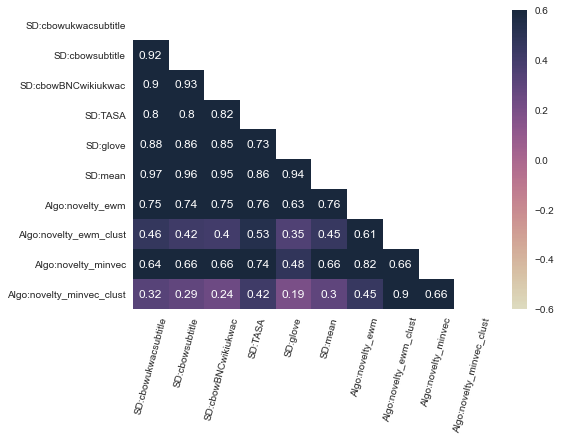

In [203]:
custom_palette = sns.color_palette("ch:s=-.6,r=.8", as_cmap=True)
novelty_semdis_table_matrix = np.triu(novelty_semdis_table.corr())
novelty_semdis_table_hm = sns.heatmap(novelty_semdis_table.corr(), vmin=-0.6, vmax=0.6, center= 0, mask=novelty_semdis_table_matrix, 
            annot = True, fmt='.2g', cmap = custom_palette)
#.get_figure().savefig('income_f_age.png') 

novelty_semdis_table_hm.set_xticklabels(novelty_semdis_table_hm.get_xticklabels(), rotation=75)

## SemDis vs Human Rating Heatmap

In [33]:
def get_semdis_human_table(novelty_dict_values):
    collapse_novelty_df = pd.concat(novelty_dict_values)
    participant_avg_novelty_df = get_novelty_avg_semdis(collapse_novelty_df)
    participant_avg_novelty_df = participant_avg_novelty_df.drop('id', axis=1)
    participant_avg_novelty_df = participant_avg_novelty_df.iloc[:,4:]
    participant_avg_novelty_df = participant_avg_novelty_df.rename(columns={'cbowukwacsubtitle': 'SD:cbowukwacsubtitle', 'cbowsubtitle': 'SD:cbowsubtitle'
                                             , 'cbowBNCwikiukwac': 'SD:cbowBNCwikiukwac', 'TASA': 'SD:TASA'
                                             , 'glove': 'SD:glove', 'SemDis_MEAN': 'SD:mean'
                                             , 'novelty_1': 'Human:novelty_1', 'novelty_2': 'Human:novelty_2'
                                             , 'novelty_m': "Human:novelty_m"})
    display(participant_avg_novelty_df)
    return participant_avg_novelty_df

In [34]:
semdis_human_table = get_semdis_human_table(novelty_dict.values())

,SD:cbowukwacsubtitle,SD:cbowsubtitle,SD:cbowBNCwikiukwac,SD:TASA,SD:glove,SD:mean,Human:novelty_1,Human:novelty_2,Human:novelty_m
0,0.950625,0.958228,0.950869,0.965343,1.004823,0.965978,2.627907,2.744186,2.686047
1,0.825773,0.868308,0.876216,0.919684,0.862047,0.870406,2.192308,2.480769,2.336538
2,0.906865,0.952628,0.948744,0.945728,0.985755,0.947944,2.303030,2.393939,2.348485
3,0.828138,0.884715,0.892016,0.926774,0.879658,0.882260,2.608696,2.565217,2.586957
4,0.904187,0.931952,0.917701,0.924515,0.945857,0.924842,2.551724,2.310345,2.431034
...,...,...,...,...,...,...,...,...,...
85,0.758211,0.814478,0.853996,0.873162,0.827565,0.825482,2.058824,2.176471,2.117647
86,0.920046,0.972731,0.975829,0.962938,1.010314,0.968372,2.023810,2.142857,2.083333
87,0.896435,0.952157,0.939680,0.958445,0.997124,0.948768,2.321429,2.321429,2.321429
88,0.871796,0.923463,0.922524,0.936500,0.946687,0.920194,2.378378,2.270270,2.324324


<AxesSubplot:>

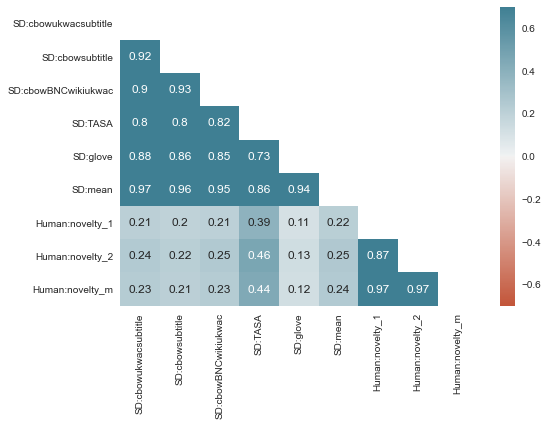

In [35]:
semdis_human_table_matrix = np.triu(semdis_human_table.corr())
sns.heatmap(semdis_human_table.corr(), vmin=-0.7, vmax=0.7, center= 0, mask=semdis_human_table_matrix, 
            annot = True, fmt='.2g', cmap = sns.diverging_palette(20, 220, as_cmap=True))

## Flexibility vs Human Ratings Heatmap

In [36]:
def get_flexibility_human_table(flexibility_dict_values):
    collapse_flexibility_df = pd.concat(flexibility_dict_values)
    participant_avg_flexibility_df = get_flexibility_avg(collapse_flexibility_df)
    participant_avg_flexibility_df = participant_avg_flexibility_df.drop('id', axis=1)
    participant_avg_flexibility_df = participant_avg_flexibility_df.rename(columns={'flex_1': 'Human:flexibility_1'
                                             , 'flex_2': 'Human:flexibility_2', 'flex_m': 'Human:flexibility_m'
                                             , 'flex_method': 'Algo:flexibility'})
    display(participant_avg_flexibility_df)
    return participant_avg_flexibility_df

In [37]:
flexibility_human_table = get_flexibility_human_table(flexibility_dict.values())

,Human:flexibility_1,Human:flexibility_2,Human:flexibility_m,Algo:flexibility
0,3.250000,3.250000,3.250000,3.125000
1,2.250000,2.250000,2.250000,2.875000
2,1.875000,1.875000,1.875000,2.875000
3,2.500000,2.500000,2.500000,3.125000
4,2.000000,2.000000,2.000000,2.500000
...,...,...,...,...
85,2.375000,2.375000,2.375000,2.500000
86,1.875000,1.875000,1.875000,3.625000
87,1.750000,1.750000,1.750000,2.875000
88,1.625000,1.625000,1.625000,2.750000


<AxesSubplot:>

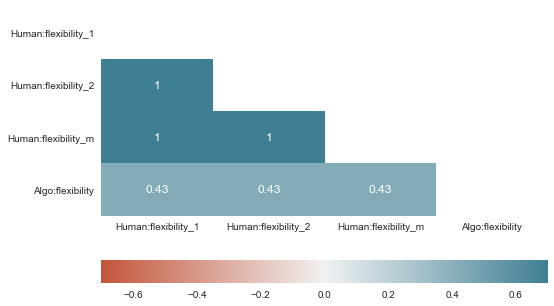

In [38]:
flexibility_human_table_matrix = np.triu(flexibility_human_table.corr())
sns.heatmap(flexibility_human_table.corr(), vmin=-0.7, vmax=0.7, center= 0, mask=flexibility_human_table_matrix
            , annot = True, fmt='.2g', cmap = sns.diverging_palette(20, 220, as_cmap=True)
           , cbar_kws={"orientation": "horizontal"})

## Flexibiltiy and Novelty Comparison

In [39]:
def get_novelty_flexibility_table(novelty_dict_values, flexibility_dict_values):
    collapse_novelty_df = pd.concat(novelty_dict_values)
    collapse_flexibility_df = pd.concat(flexibility_dict_values)
    participant_avg_novelty_df = get_novelty_avg(collapse_novelty_df)
    participant_avg_flexibility_df = get_flexibility_avg(collapse_flexibility_df)
    combined_df = pd.merge(participant_avg_novelty_df, participant_avg_flexibility_df, how='inner', on = 'id')
    combined_df = combined_df.drop('id', axis=1)
    combined_df = combined_df.rename(columns={
                                             'novelty_1': 'Human:novelty_1', 'novelty_2': 'Human:novelty_2'
                                             , 'novelty_m': "Human:novelty_m", 'flex_1': 'Human:flexibility_1'
                                             , 'flex_2': 'Human:flexibility_2', 'flex_m': 'Human:flexibility_m'
                                             , 'flex_method': 'Algo:flexibility'
                                             , 'ewm': 'Algo:novelty_ewm', 'ewm_clust': 'Algo:novelty_ewm_clust'
                                             , 'minvec': 'Algo:novelty_minvec', 'minvec_clust': 'Algo:novelty_minvec_clust'})
    return combined_df

In [40]:
novelty_flexibility_table = get_novelty_flexibility_table(novelty_dict.values() ,flexibility_dict.values())

<AxesSubplot:>

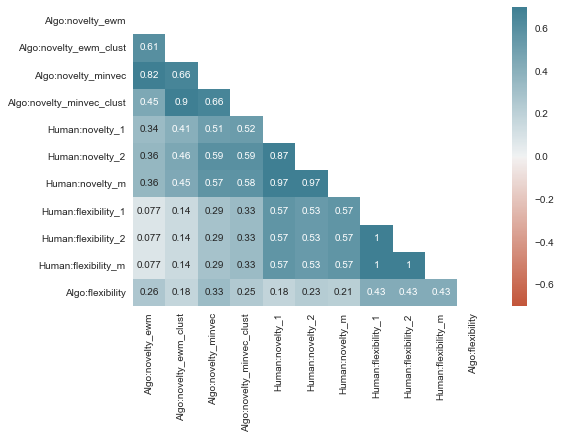

In [41]:
novelty_flexibility_table_matrix = np.triu(novelty_flexibility_table.corr())
sns.heatmap(novelty_flexibility_table.corr(), vmin=-0.7, vmax=0.7, center= 0, mask=novelty_flexibility_table_matrix
            , annot = True, fmt='.2g', cmap = sns.diverging_palette(20, 220, as_cmap=True)
           , annot_kws={"fontsize":10})

## Originality Comparisons Heatmap

In [42]:
def get_originality_table(novelty_dict_values, flexibility_dict_values, originality_dict_values):
    collapse_novelty_df = pd.concat(novelty_dict_values)
    collapse_flexibility_df = pd.concat(flexibility_dict_values)
    collapse_originality_df = pd.concat(originality_dict_values)
    participant_avg_novelty_df = get_novelty_avg(collapse_novelty_df)
    participant_avg_flexibility_df = get_flexibility_avg(collapse_flexibility_df)
    participant_avg_originality_df = get_originality_avg(collapse_originality_df)
    combined_df = pd.merge(participant_avg_novelty_df, participant_avg_flexibility_df, how='inner', on = 'id')
    combined_df = pd.merge(combined_df, participant_avg_originality_df, how='inner', on = 'id')
    combined_df = combined_df.drop('id', axis=1)
    return combined_df

In [43]:
originality_table = get_originality_table(novelty_dict.values() ,flexibility_dict.values(), originality_dict.values())

<AxesSubplot:>

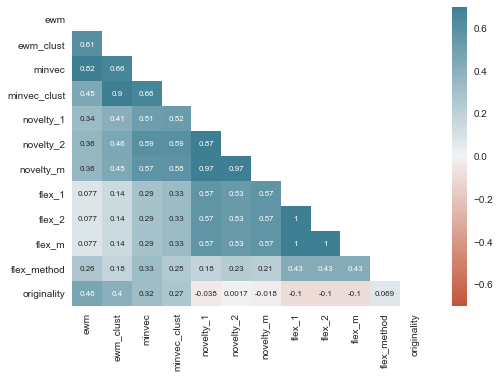

In [44]:
originality_table_matrix = np.triu(originality_table.corr())
sns.heatmap(originality_table.corr(), vmin=-0.7, vmax=0.7, center= 0, mask=originality_table_matrix
            , annot = True, fmt='.2g', annot_kws={"fontsize":8}, cmap = sns.diverging_palette(20, 220, as_cmap=True))

In [45]:
def get_originality_corrs(novelty_dict_values, flexibility_dict_values, originality_dict_values):
    collapse_novelty_df = pd.concat(novelty_dict_values)
    collapse_flexibility_df = pd.concat(flexibility_dict_values)
    collapse_originality_df = pd.concat(originality_dict_values)
    participant_avg_novelty_df = get_novelty_avg(collapse_novelty_df)
    participant_avg_flexibility_df = get_flexibility_avg(collapse_flexibility_df)
    participant_avg_originality_df = get_originality_avg(collapse_originality_df)
    combined_df = pd.merge(participant_avg_novelty_df, participant_avg_flexibility_df, how='inner', on = 'id')
    combined_df = pd.merge(combined_df, participant_avg_originality_df, how='inner', on = 'id')
    combined_df = combined_df.drop('id', axis=1)
    pval_df = calculate_pvalues(combined_df)
    corrs_df = combined_df.corr()
    corrs_df = pd.DataFrame(corrs_df.iloc[:10, 11:])
    pval_df = pd.DataFrame(pval_df.iloc[:10, 11:])
    pval_df.columns = ['originality_pval']
    corr_pval_df = pd.concat([corrs_df, pval_df], axis=1)
    corr_pval_df = corr_pval_df[['originality', 'originality_pval']]
    corr_pval_df.index.rename('metrics', inplace=True)
    display(corr_pval_df)

In [46]:
get_originality_corrs(novelty_dict.values() ,flexibility_dict.values(), originality_dict.values())

,originality,originality_pval
metrics,,
ewm,0.459759,0.0
ewm_clust,0.404720,0.0001
minvec,0.324505,0.0018
minvec_clust,0.271635,0.0096
novelty_1,-0.037868,0.7231
novelty_2,0.001731,0.9871
novelty_m,-0.018426,0.8631
flex_1,-0.101286,0.3422
flex_2,-0.101286,0.3422


## Fluency Comparisons Heatmap

In [47]:
def get_fluency_table(novelty_dict_values, flexibility_dict_values, fluency_dict_values):
    collapse_novelty_df = pd.concat(novelty_dict_values)
    collapse_flexibility_df = pd.concat(flexibility_dict_values)
    collapse_fluency_df = pd.concat(fluency_dict_values)
    participant_avg_novelty_df = get_novelty_avg(collapse_novelty_df)
    participant_avg_flexibility_df = get_flexibility_avg(collapse_flexibility_df)
    participant_avg_fluency_df = get_fluency_avg(collapse_fluency_df)
    combined_df = pd.merge(participant_avg_novelty_df, participant_avg_flexibility_df, how='inner', on = 'id')
    combined_df = pd.merge(combined_df, participant_avg_fluency_df, how='inner', on = 'id')
    combined_df = combined_df.drop('id', axis=1)
    return combined_df

In [48]:
fluency_table = get_fluency_table(novelty_dict.values() ,flexibility_dict.values(), fluency_dict.values())

<AxesSubplot:>

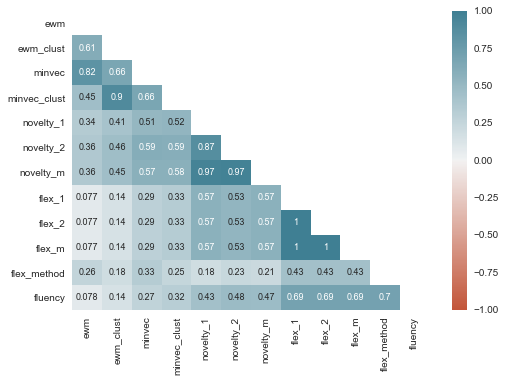

In [49]:
fluency_table_matrix = np.triu(fluency_table.corr())
sns.heatmap(fluency_table.corr(), vmin=-1, vmax=1, center= 0, mask=fluency_table_matrix
            , annot = True, fmt='.2g', annot_kws={"fontsize":9}, cmap = sns.diverging_palette(20, 220, as_cmap=True))

In [50]:
def get_fluency_corrs(novelty_dict_values, flexibility_dict_values, fluency_dict_values):
    collapse_novelty_df = pd.concat(novelty_dict_values)
    collapse_flexibility_df = pd.concat(flexibility_dict_values)
    collapse_fluency_df = pd.concat(fluency_dict_values)
    participant_avg_novelty_df = get_novelty_avg(collapse_novelty_df)
    participant_avg_flexibility_df = get_flexibility_avg(collapse_flexibility_df)
    participant_avg_fluency_df = get_fluency_avg(collapse_fluency_df)
    combined_df = pd.merge(participant_avg_novelty_df, participant_avg_flexibility_df, how='inner', on = 'id')
    combined_df = pd.merge(combined_df, participant_avg_fluency_df, how='inner', on = 'id')
    combined_df = combined_df.drop('id', axis=1)
    pval_df = calculate_pvalues(combined_df)
    corrs_df = combined_df.corr()
    corrs_df = pd.DataFrame(corrs_df.iloc[:10, 11:])
    pval_df = pd.DataFrame(pval_df.iloc[:10, 11:])
    pval_df.columns = ['fluency_pval']
    corr_pval_df = pd.concat([corrs_df, pval_df], axis=1)
    corr_pval_df = corr_pval_df[['fluency', 'fluency_pval']]
    corr_pval_df.index.rename('metrics', inplace=True)
    display(corr_pval_df)

In [51]:
get_fluency_corrs(novelty_dict.values() ,flexibility_dict.values(), fluency_dict.values())

,fluency,fluency_pval
metrics,,
ewm,0.077911,0.4654
ewm_clust,0.144164,0.1752
minvec,0.266995,0.011
minvec_clust,0.319929,0.0021
novelty_1,0.432215,0.0
novelty_2,0.480047,0.0
novelty_m,0.471494,0.0
flex_1,0.692599,0.0
flex_2,0.692599,0.0


## Combine Semantic Spaces
## Per Prompt per Individual

In [52]:
novel_dict_box = ['box_banori_results', 'box_cbow_6_ukwac_subtitle_results', 'box_cbow_subtitle_results', 'box_glove_6B_results', 'box_TASA_results']
novel_dict_brick = ['brick_banori_results', 'brick_cbow_6_ukwac_subtitle_results', 'brick_cbow_subtitle_results', 'brick_glove_6B_results', 'brick_TASA_results']
novel_dict_chair = ['chair_banori_results', 'chair_cbow_6_ukwac_subtitle_results', 'chair_cbow_subtitle_results', 'chair_glove_6B_results', 'chair_TASA_results']
novel_dict_cup = ['cup_banori_results', 'cup_cbow_6_ukwac_subtitle_results', 'cup_cbow_subtitle_results', 'cup_glove_6B_results', 'cup_TASA_results']
novel_dict_key = ['key_banori_results', 'key_cbow_6_ukwac_subtitle_results', 'key_cbow_subtitle_results', 'key_glove_6B_results', 'key_TASA_results']
novel_dict_pencil = ['pencil_banori_results', 'pencil_cbow_6_ukwac_subtitle_results', 'pencil_cbow_subtitle_results', 'pencil_glove_6B_results', 'pencil_TASA_results']
novel_dict_rope = ['rope_banori_results', 'rope_cbow_6_ukwac_subtitle_results', 'rope_cbow_subtitle_results', 'rope_glove_6B_results', 'rope_TASA_results']
novel_dict_shoe = ['shoe_banori_results', 'shoe_cbow_6_ukwac_subtitle_results', 'shoe_cbow_subtitle_results', 'shoe_glove_6B_results', 'shoe_TASA_results']

In [53]:
novel_dict_list = [novel_dict_box, novel_dict_brick, novel_dict_chair, novel_dict_cup, novel_dict_key
                  , novel_dict_pencil, novel_dict_rope, novel_dict_shoe]

In [54]:
def collapse_prompt_novelty(prompt_list):
    df_list = []
    for key in prompt_list:
        df_list.append(novelty_dict[key])
        
    return pd.concat(df_list)

In [55]:
def print_per_prompt_results(metric_dict, function):
    key_list = list(metric_dict.keys())
    print(function)
    for i in range(len(key_list)):
        print(key_list[i])
        function(novel_dict_list[i], key_list[i])

## Comparing Flexibility Results with Novelty Results

In [56]:
def calculate_corrs_novelty_flexibility(prompt_list, prompt):
    collapse_novelty_df = collapse_prompt_novelty(prompt_list)
    collapse_flexibility_df = flexibility_dict[prompt]
    participant_avg_novelty_df = get_novelty_avg(collapse_novelty_df)
    participant_avg_flexibility_df = get_flexibility_avg(collapse_flexibility_df)
    combined_df = pd.merge(participant_avg_novelty_df, participant_avg_flexibility_df, how='inner', on = 'id')
    combined_df = combined_df.drop('id', axis=1)
    pval_df = calculate_pvalues(combined_df)
    corrs_df = combined_df.corr()
    corrs_df = pd.DataFrame(corrs_df.iloc[:8, 8:])
    pval_df = pd.DataFrame(pval_df.iloc[:8, 8:])
    pval_df.columns = ['flex_1_pval', 'flex_2_pval', 'flex_m_pval', 'flex_method_pval']
    corr_pval_df = pd.concat([corrs_df, pval_df], axis=1)
    corr_pval_df = corr_pval_df[['flex_1', 'flex_1_pval','flex_2', 'flex_2_pval', 'flex_m', 'flex_m_pval', 'flex_method', 'flex_method_pval']]
    corr_pval_df.index.rename('metrics', inplace=True)
    display(corr_pval_df)

In [57]:
print_per_prompt_results(flexibility_dict, calculate_corrs_novelty_flexibility)

<function calculate_corrs_novelty_flexibility at 0x000001D19AC65CA0>
box


ValueError: Length mismatch: Expected axis has 3 elements, new values have 4 elements

ewm:
- 2/8 sig flex_1, flex_2, flex_m, flex_method

ewm_clust:
- 3/8 sig flex_1, flex_2, flex_m
- 4/8 sig flex_method

minvec:
- 3/8 sig flex_1, flex_2, flex_m

minvec_clust:
- 3/8 sig flex_1, flex_m, flex_m
- 4/8 sig flex_method

minvec_min:
- 2/8 sig flex_1, flex_2, flex_m
- 4/8 sig flex_method

novelty_1:
- 7/8 sig flex_1, flex_2, flex_m
- 1/8 sig flex_method

novelty_2:
- 7/8 sig flex_1, flex_2, flex_m
- 3/8 sig flex_method

novelty_3:
- 7/8 sig flex_1, flex_2, flex_m
- 2/8 sig flex_method

## Comparing Originality with Novelty Results

In [ ]:
def calculate_corrs_novelty_originality(prompt_list, prompt):
    collapse_novelty_df = collapse_prompt_novelty(prompt_list)
    collapse_originality_df = originality_dict[prompt]
    participant_avg_novelty_df = get_novelty_avg(collapse_novelty_df)
    participant_avg_originality_df = get_originality_avg(collapse_originality_df)
    combined_df = pd.merge(participant_avg_novelty_df, participant_avg_originality_df, how='inner', on = 'id')
    combined_df = combined_df.drop('id', axis=1)
    pval_df = calculate_pvalues(combined_df)
    corrs_df = combined_df.corr()
    corrs_df = pd.DataFrame(corrs_df.iloc[:8, 8:])
    pval_df = pd.DataFrame(pval_df.iloc[:8, 8:])
    pval_df.columns = ['originality_pval']
    corr_pval_df = pd.concat([corrs_df, pval_df], axis=1)
    corr_pval_df = corr_pval_df[['originality', 'originality_pval']]
    corr_pval_df.index.rename('metrics', inplace=True)
    display(corr_pval_df)

In [ ]:
print_per_prompt_results(originality_dict, calculate_corrs_novelty_originality)

novelty_m and novelt_2:
- 2/8 sig

novelty_1:
- 1/8 sig

ewm:
- 3/8 sig

ewm_clust:
- 5/8 sig

minvec:
- 2/8 sig

minvec_clust:
- 3/8 sig

minvec_min:
- 4/8 sig


## Comparing Originality Results with Flexibility

In [ ]:
def calculate_corrs_originality_flexibility(prompt_list, prompt):
    collapse_flexibility_df = flexibility_dict[prompt]
    collapse_originality_df = originality_dict[prompt]
    participant_avg_flexibility_df = get_flexibility_avg(collapse_flexibility_df)
    participant_avg_originality_df = get_originality_avg(collapse_originality_df)
    combined_df = pd.merge(participant_avg_flexibility_df, participant_avg_originality_df, how='inner', on = 'id')
    combined_df = combined_df.drop('id', axis=1)
    pval_df = calculate_pvalues(combined_df)
    corrs_df = combined_df.corr()
    corrs_df = pd.DataFrame(corrs_df.iloc[:4, 4:])
    pval_df = pd.DataFrame(pval_df.iloc[:4, 4:])
    pval_df.columns = ['originality_pval']
    corr_pval_df = pd.concat([corrs_df, pval_df], axis=1)
    corr_pval_df = corr_pval_df[['originality', 'originality_pval']]
    corr_pval_df.index.rename('metrics', inplace=True)
    display(corr_pval_df)

In [ ]:
print_per_prompt_results(originality_dict, calculate_corrs_originality_flexibility)

human ratings:
 - never sig
 
flex_method:
 - 4/8 sig

## Comparing Fluency with Novelty Results

In [ ]:
def calculate_corrs_novelty_fluency(prompt_list, prompt):
    collapse_novelty_df = collapse_prompt_novelty(prompt_list)
    collapse_fluency_df = fluency_dict[prompt]
    participant_avg_novelty_df = get_novelty_avg(collapse_novelty_df)
    participant_avg_fluency_df = get_fluency_avg(collapse_fluency_df)
    combined_df = pd.merge(participant_avg_novelty_df, participant_avg_fluency_df, how='inner', on = 'id')
    combined_df = combined_df.drop('id', axis=1)
    pval_df = calculate_pvalues(combined_df)
    corrs_df = combined_df.corr()
    corrs_df = pd.DataFrame(corrs_df.iloc[:8, 8:])
    pval_df = pd.DataFrame(pval_df.iloc[:8, 8:])
    pval_df.columns = ['fluency_pval']
    corr_pval_df = pd.concat([corrs_df, pval_df], axis=1)
    corr_pval_df = corr_pval_df[['fluency', 'fluency_pval']]
    corr_pval_df.index.rename('metrics', inplace=True)
    display(corr_pval_df)

In [ ]:
print_per_prompt_results(fluency_dict, calculate_corrs_novelty_fluency)

human ratings:
- almost always significant
- if not, barely off

ewm methods:
- most of the time, far from 0.05
- some occasional significance

minvec methods:
minvec:
- 4/8 sig
minvec_clust:
- 5/8 sig
minvec_min:
- 3/8 sig

## Comparing Fluency with Flexibility Results

In [ ]:
def calculate_corrs_originality_flexibility(prompt_list, prompt):
    collapse_flexibility_df = flexibility_dict[prompt]
    collapse_fluency_df = fluency_dict[prompt]
    participant_avg_flexibility_df = get_flexibility_avg(collapse_flexibility_df)
    participant_avg_fluency_df = get_fluency_avg(collapse_fluency_df)
    combined_df = pd.merge(participant_avg_flexibility_df, participant_avg_fluency_df, how='inner', on = 'id')
    combined_df = combined_df.drop('id', axis=1)
    pval_df = calculate_pvalues(combined_df)
    corrs_df = combined_df.corr()
    corrs_df = pd.DataFrame(corrs_df.iloc[:4, 4:])
    pval_df = pd.DataFrame(pval_df.iloc[:4, 4:])
    pval_df.columns = ['fluency_pval']
    corr_pval_df = pd.concat([corrs_df, pval_df], axis=1)
    corr_pval_df = corr_pval_df[['fluency', 'fluency_pval']]
    corr_pval_df.index.rename('metrics', inplace=True)
    display(corr_pval_df)

In [ ]:
print_per_prompt_results(fluency_dict, calculate_corrs_originality_flexibility)

always significant

## Comparing Novelty Method with Human Ratings

In [ ]:
def calculate_corrs_novelty(prompt_list, prompt):
    collapse_novelty_df = collapse_prompt_novelty(prompt_list)
    participant_avg_novelty_df = get_novelty_avg_semdis(collapse_novelty_df)
    participant_avg_novelty_df = participant_avg_novelty_df.drop('id', axis=1)
    pval_df = calculate_pvalues(participant_avg_novelty_df)
    corrs_df = participant_avg_novelty_df.corr()
    corrs_df = pd.DataFrame(corrs_df.iloc[:5, 5:])
    pval_df = pd.DataFrame(pval_df.iloc[:5, 5:])
    display(corrs_df)
    display(pval_df)
#     pval_df.columns = ['novelty_1_pval', "novelty_2_pval", 'novelty_m_pval']
    corr_pval_df = pd.concat([corrs_df, pval_df], axis=1)
#     corr_pval_df = corr_pval_df[['novelty_1', "novelty_1_pval", 'novelty_2', 'novelty_2_pval', "novelty_m", 'novelty_m_pval']]
#     corr_pval_df.index.rename('metrics', inplace=True)
#     display(corr_pval_df)

In [ ]:
print_per_prompt_results(originality_dict, calculate_corrs_novelty)

ewm:
 - 4/8 sig novelty_m and novelty_1
 - 5/8 sig novelty_2
 
ewm_clust:
 - 4/8 sig novelty_m and novelty_2
 - 3/8 sig novelty_1

minvec:
- always significant for novelty_m
- 6/8 sig novelty_1 and novelty_2

minvec_clust:
- always significant for every rater

minvec_min:
- 5/8 sig novelty_m
- 4/8 sig novelty_1 and novelty_2

## Comparing Flexibility Method with Human Ratings

In [ ]:
def calculate_corrs_flexibility(prompt_list, prompt):
    collapse_flexibility_df = flexibility_dict[prompt]
    participant_avg_flexibility_df = get_flexibility_avg(collapse_flexibility_df)
    participant_avg_flexibility_df = participant_avg_flexibility_df.drop('id', axis=1)
    pval_df = calculate_pvalues(participant_avg_flexibility_df)
    corrs_df = participant_avg_flexibility_df.corr()
    corrs_df = pd.DataFrame(corrs_df.iloc[:3, 3:])
    pval_df = pd.DataFrame(pval_df.iloc[:3, 3:])
    pval_df.columns = ['flex_method_pval']
    corr_pval_df = pd.concat([corrs_df, pval_df], axis=1)
    corr_pval_df.index.rename('metrics', inplace=True)
    display(corr_pval_df)

In [ ]:
print_per_prompt_results(originality_dict, calculate_corrs_flexibility)

7/8 prompts sig